In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
df = df.drop(['Car_Name'], axis=1)

In [4]:
label_encoders = {}
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [6]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Architecture 1

In [12]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # No activation for regression

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 51.3917 - mae: 4.4240 - val_loss: 45.0641 - val_mae: 4.9364
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.7198 - mae: 3.7747 - val_loss: 42.3082 - val_mae: 4.8056
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 38.8373 - mae: 4.0192 - val_loss: 39.3927 - val_mae: 4.6591
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.5081 - mae: 3.8205 - val_loss: 36.4429 - val_mae: 4.4937
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.9120 - mae: 3.8396 - val_loss: 33.5074 - val_mae: 4.3092
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31.7033 - mae: 3.7147 - val_loss: 30.4856 - val_mae: 4.1025
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.9746 - mae: 3.3296 - val_loss: 27.3299 - val_mae: 3.8757
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.4473 - mae: 3.0480 - val_loss: 24.2313 - val_mae: 3.6345
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss

In [14]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4725 - mae: 0.4825
Test MAE: 0.51


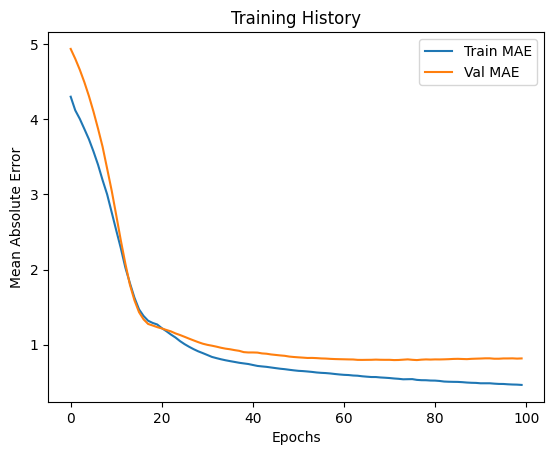

In [15]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [16]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Architecture 2

In [18]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 45.5384 - mae: 4.1390 - val_loss: 40.9738 - val_mae: 4.6673
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 33.9621 - mae: 3.6573 - val_loss: 34.5143 - val_mae: 4.2573
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 29.0070 - mae: 3.3968 - val_loss: 25.7946 - val_mae: 3.6999
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.3722 - mae: 2.8670 - val_loss: 16.1789 - val_mae: 2.9250
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.3511 - mae: 2.2203 - val_loss: 8.2211 - val_mae: 2.1969
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.3804 - mae: 2.3979 - val_loss: 4.0956 - val_mae: 1.7357
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6135 - mae: 1.8253 - val_loss: 2.9082 - val_mae: 1.4261
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4424 - mae: 1.6311 - val_loss: 2.2489 - val_mae: 1.1616
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.92

In [20]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4962 - mae: 0.4551
Test MAE: 0.47


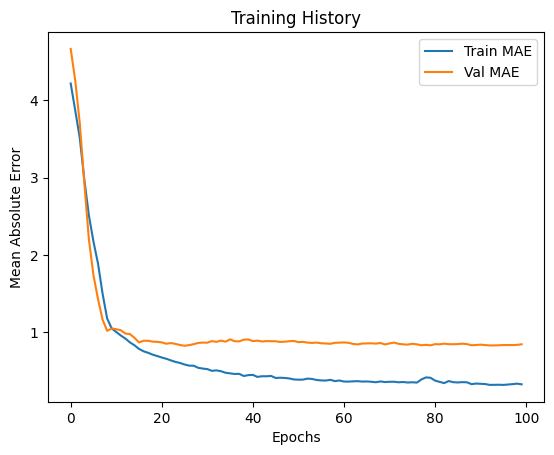

In [21]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [22]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - loss: 47.9333 - mae: 4.4834 - val_loss: 45.3981 - val_mae: 4.9739
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 43.7723 - mae: 4.1878 - val_loss: 42.9362 - val_mae: 4.8014
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 37.4447 - mae: 3.7782 - val_loss: 40.5178 - val_mae: 4.6543
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 45.9470 - mae: 4.1316 - val_loss: 37.9474 - val_mae: 4.5093
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 36.9212 - mae: 3.7704 - val_loss: 35.3253 - val_mae: 4.3552
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 33.0903 - mae: 3.6299 - val_loss: 32.6355 - val_mae: 4.1938
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 26.2441 - mae: 3.3169 - val_loss: 29.8969 - val_mae: 4.0170
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 34.0202 - mae: 3.6185 - val_loss: 26.9703 - val_mae: 3.8137
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 30.533

In [24]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0239 - mae: 0.6909
Test MAE: 0.67


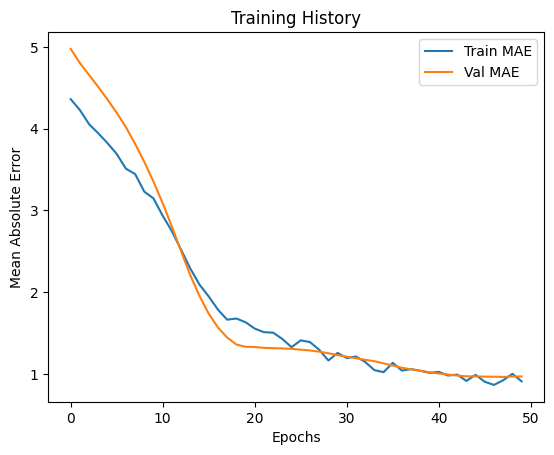

In [25]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [26]:
model = Sequential([
    Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 36.9925 - mae: 3.7936 - val_loss: 30.2159 - val_mae: 4.0205
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 33.7682 - mae: 3.4304 - val_loss: 17.2694 - val_mae: 3.0336
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.5850 - mae: 2.2467 - val_loss: 6.3901 - val_mae: 1.7873
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.2755 - mae: 1.3260 - val_loss: 2.7192 - val_mae: 1.1988
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0104 - mae: 1.1314 - val_loss: 2.4025 - val_mae: 1.0917
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7942 - mae: 0.8930 - val_loss: 2.5330 - val_mae: 1.0697
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9989 - mae: 0.9011 - val_loss: 2.1186 - val_mae: 0.9692
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5833 - mae: 0.8377 - val_loss: 2.0246 - val_mae: 0.9135
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.4970 -

In [28]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6481 - mae: 0.5472
Test MAE: 0.55


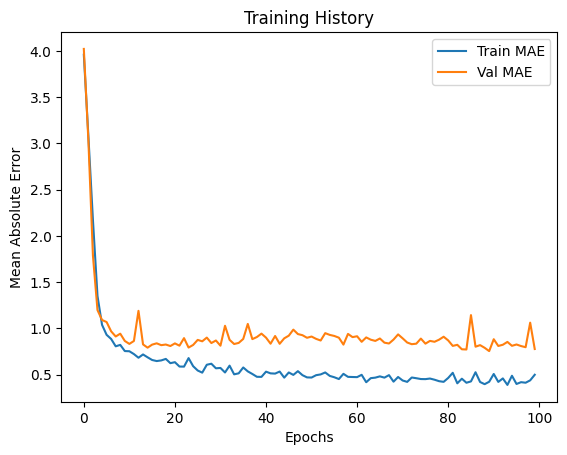

In [29]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [31]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Slightly lower learning rate
    loss='mse',
    metrics=['mae', 'mse']  # Include mse in metrics for monitoring
)

In [32]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 44.8798 - mae: 4.1807 - mse: 44.8798 - val_loss: 38.3824 - val_mae: 4.5348 - val_mse: 38.3824
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.5334 - mae: 3.8597 - mse: 39.5334 - val_loss: 24.7574 - val_mae: 3.6970 - val_mse: 24.7574
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30.8214 - mae: 3.3359 - mse: 30.8214 - val_loss: 10.2282 - val_mae: 2.3463 - val_mse: 10.2282
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.3716 - mae: 2.7578 - mse: 21.3716 - val_loss: 3.6105 - val_mae: 1.4894 - val_mse: 3.6105
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0309 - mae: 1.6226 - mse: 6.0309 - val_loss: 2.6070 - val_mae: 1.1699 - val_mse: 2.6070
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7696 - mae: 1.3950 - mse: 5.7696 - val_loss: 2.1923 - val_mae: 1.0905 - val_mse: 2.1923
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9324 - mae: 1.1679 - mse: 2

In [36]:
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {mse:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.5786 - mae: 0.5215 - mse: 0.5786
Test MAE: 0.54
Test MSE: 0.60


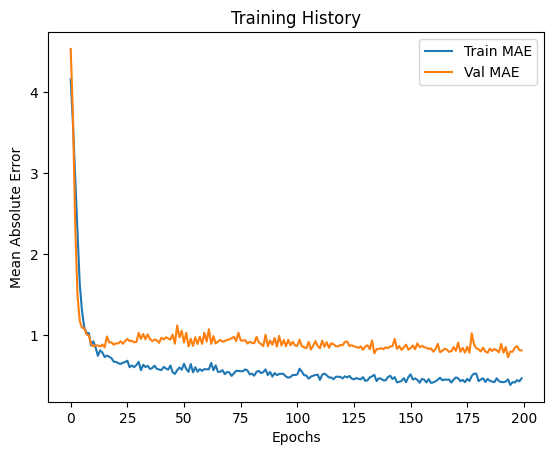

In [34]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

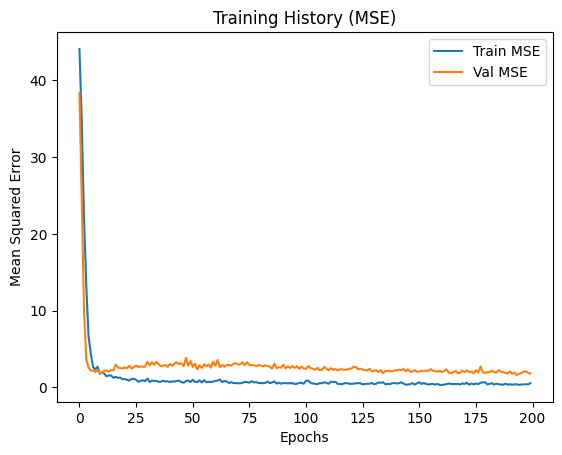

In [37]:
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training History (MSE)')
plt.show()